This example file is intended to cover computations for the computations in the publication

    Bankmann, D.; Mehrmann, V.; Nesterov, Y.; van Dooren, P., Analytic Center for the Passivity LMI, 2019

# Initialization

In [1]:
import logging
import numpy as np
from os.path import join, dirname
from analyticcenter import WeightedSystem, get_algorithm_object
from analyticcenter.visualize import log_log_direction
from analyticcenter.examples.example4 import sys
import numpy as np
np.linalg.eigh(sys.A)[0]

array([-1.52122444e+02, -5.41057587e+00, -4.51118640e+00, -4.04647716e+00, -3.43730019e+00, -3.20461118e+00, -2.97444371e+00, -2.69012010e+00, -2.34853032e+00, -2.14555476e+00, -2.01177581e+00,
       -1.78595776e+00, -1.64092618e+00, -1.50025832e+00, -1.40517192e+00, -1.10265093e+00, -1.02176322e+00, -8.52622412e-01, -7.65973179e-01, -7.28797352e-01, -6.69615592e-01, -5.68515821e-01,
       -5.61545030e-01, -4.13063586e-01, -4.05924051e-01, -2.58237793e-01, -1.74338416e-01, -1.33173996e-01, -1.08110819e-01, -4.66234931e-02])

# Computation of analytic center with the newton approach.

In [2]:
print(__debug__)
logger = logging.getLogger()

alg_newton = get_algorithm_object(sys, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton, success) = alg_newton()

True
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:151)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 277.1098932079061 (initialization.py:67)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 4.578080216053577e-159 (initialization.py:78)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 235.71930021086197	Det: 277.1098

In [3]:
sys_disc = sys.bilinear_discretization()

alg_newton_disc = get_algorithm_object(sys_disc, 'newton', discrete_time=True, save_intermediate=True)
(ac_newton_disc, success) = alg_newton_disc()

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Computing Analytic Center with Newton approach (direction.py:151)
[INFO    ][InitialXDT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXDT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 1.8809350476851345e-14 (initialization.py:67)
[INFO    ][InitialXDT] --- Computed initial guess with bisection approach.
det(H(X0)) = 6.850533243108757e-162 (initialization.py:78)
[INFO    ][InitialXDT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Current step: 0	Residual: 5.477225574936818	Det: 1.880935047679179e-14 (direction.py:69)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- In linearly converging phase (newton.py:62)
[INFO    ][NewtonDirectionMultipleDimensionsDT] --- Current step: 1	Residual: 3.83584032253448	Det:

# Properties of solutions
## Difference
The solutions should be identical in theory. They differ a bit due to roundoff errors.

In [16]:
 print("scaled difference = ", np.linalg.norm((ac_newton.X - ac_newton_disc.X )/ac_newton.X)) 


scaled difference =  8.024650142304834e-08


## Centered realizations
A centered realization with the analytic center solution `X` has the identity as interior point. However, also here, the geometric mean approach is superior

In [15]:
centered_realization = ac_newton.centered_realization()
alg_newton_centered = get_algorithm_object(centered_realization, 'newton', discrete_time=False, save_intermediate=True)
(ac_newton_centered, success) = alg_newton_centered()
print("Eigenvalues of analytic center:\n",np.linalg.eigh(ac_newton_centered.X)[0])

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Computing Analytic Center with NewtonMDCT approach (direction.py:151)
[INFO    ][InitialXCT] --- Computing initial X (initialization.py:57)
[INFO    ][InitialXCT] --- Computed initial guess with geometric mean approach.
det(H(X0)) = 4.2194379594594075e-33 (initialization.py:67)
[INFO    ][InitialXCT] --- Computed initial guess with bisection approach.
det(H(X0)) = 6.972049864850732e-194 (initialization.py:78)
[INFO    ][InitialXCT] --- Taking solution computed with geometric mean approach (initialization.py:85)
[INFO    ][NewtonDirectionMultipleDimensionsCT] --- Current step: 0	Residual: 145.63641198187932	Det: 4.219437

## Final closed-loop matrix
We recover the properties, that every eigenvalue of the continuous-time closed-loop matrix lies on the imaginary axis, while all eigenvalues in the discrete-time case lie inside the unit circle.

In [7]:
eigs = np.linalg.eig(ac_newton.A_F)[0]
print("maximal abs value of real parts of eigenvalues:\n", np.max(np.abs(np.real(eigs))))
eigs_disc = np.linalg.eig(ac_newton_disc.A_F)[0]
print("absolute values of evs of discrete closed-loop matrix:\n", np.abs(eigs_disc))

maximal abs value of real parts of eigenvalues:
 5.824923334472876e-13
absolute values of evs of discrete closed-loop matrix:
 [0.99785611 0.99990452 0.97062008 0.97062008 0.94685901 0.8472432  0.8472432  0.71461054 0.67679616 0.60810103 0.4405096  0.4405096  0.31937987 0.26402578 0.09654606 0.05258612 0.98512968 0.19613111
 0.26210781 0.82565883 0.72720662 0.72720662 0.73608902 0.60662519 0.60662519 0.43861105 0.60665525 0.52712241 0.52712241 0.54261952]


# Computation of characteristic values

Compute the characterisic values, as in the paper 'Beattie, Mehrmann, van Dooren'.
Note, that the values compared to the paper slightly changed, because of some improvements in the alogorithm and thus slightly different value for the analytic center.

In [8]:
ac_newton.compute_characteristic_values()

[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of H(X): 5.9813944418671466e-05 (analyticcenter.py:36)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalue of X-1 * H(X) * X^-1: 5.966939557811281e-05 (analyticcenter.py:46)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of X^-.5 * H(X) * X^-.5: 5.974171472705722e-05 (analyticcenter.py:56)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Minimal eigenvalues of R of the pH realization: 0.04679321644122288 (analyticcenter.py:65)
[INFO    ][analyticcenter.algorithm.analyticcenter] --- Distance to stability is: (0.04281188879195924, 0.0) (analyticcenter.py:67)


# Generate plot of the algorithm

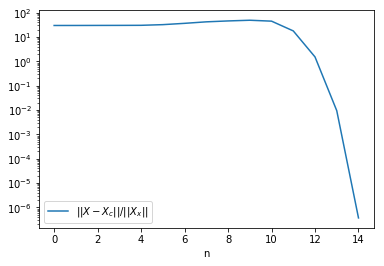

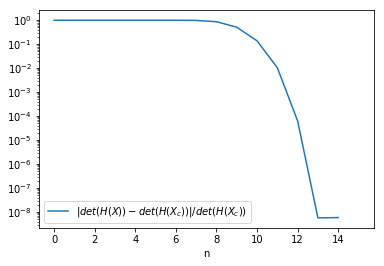

In [8]:
log_log_direction(alg_newton.intermediate_X, alg_newton.intermediate_det)

# Computation with steepest ascent approach

*Warning*: This needs some time and does not even succeed in 20000 iterations, even though the determinant increases in every step.

In [10]:
alg_steepest_ascent = get_algorithm_object(sys, 'steepestascent', discrete_time=False, save_intermediate=True)
alg_steepest_ascent.abs_tol = 10e-
alg_steepest_ascent.maxiter = 2000000
X0=alg_newton.intermediate_X[6]
alg_steepest_ascent(X0=X0)

[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is stable (riccatioperator.py:243)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is controllable. (riccatioperator.py:263)
[INFO    ][analyticcenter.algorithm.riccatioperator] --- System is passive, if also stable (riccatioperator.py:280)
[INFO    ][SteepestAscentDirectionCT] --- Computing Analytic Center with Steepest Ascent approach (direction.py:151)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 0	Residual: 2167.9022599941536	Det: 1.0575728796116653e+26 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 4.749684119037272e-05 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 1	Residual: 2167.9008432605806	Det: 1.057574059014206e+26 (direction.py:69)
[INFO    ][SteepestAscentDirectionCT] --- stepsize chosen by line_search: 1.2916082513191633e-06 (steepestascent.py:38)
[INFO    ][SteepestAscentDirectionCT] --- Current step: 2	

KeyboardInterrupt: 

In [ ]:
log_log_direction(alg_steepest_ascent.intermediate_X, alg_steepest_ascent.intermediate_det)